# Question 1

In [7]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

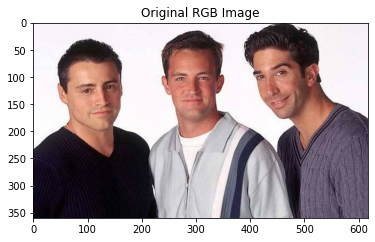

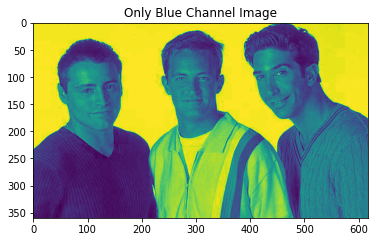

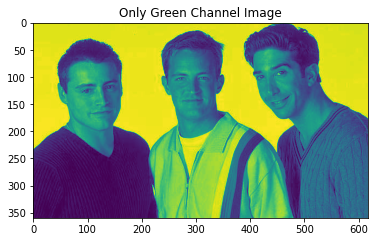

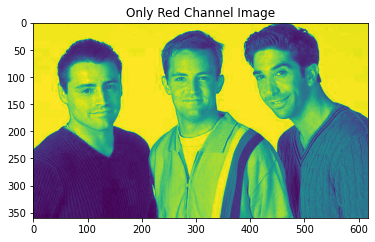

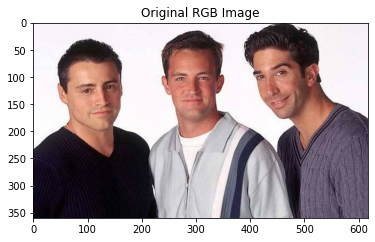

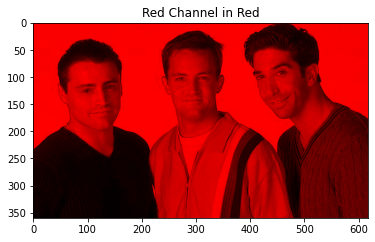

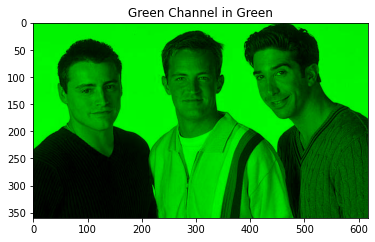

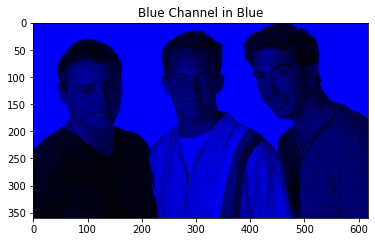

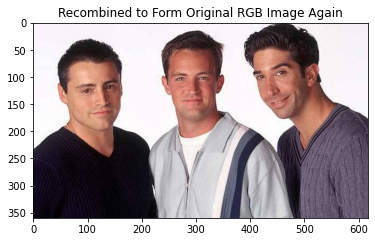

In [38]:
img = cv2.imread('image/1.jpg')
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Set blue and green and red channels 
red = img2[:,:,0]
green = img2[:,:,1]
blue = img2[:,:,2]

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original RGB Image')
plt.show()

plt.imshow(blue)
plt.title('Only Blue Channel Image')
plt.show()

plt.title('Only Green Channel Image')
plt.imshow(green)
plt.show()

plt.title('Only Red Channel Image')
plt.imshow(red)
plt.show()


# % Create an all black channel.
allBlack = np.zeros(shape = (img2.shape[0], img2.shape[1]), dtype=int);


just_red = np.zeros((img2.shape[0],img2.shape[1],3), dtype=int)
just_red[:,:,0] = red

just_green = np.zeros((img2.shape[0],img2.shape[1],3), dtype=int)
just_green[:,:,1] = green

just_blue = np.zeros((img2.shape[0],img2.shape[1],3), dtype=int)
just_blue[:,:,2] = blue


recombinedRGBImage = np.zeros((img2.shape[0],img2.shape[1],3), dtype=int)
recombinedRGBImage[:,:,2] = blue
recombinedRGBImage[:,:,1] = green
recombinedRGBImage[:,:,0] = red


#  Display them all.
img = cv2.imread('image/1.jpg')
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure()
plt.title('Original RGB Image')
plt.imshow(img2)

plt.figure()
plt.title('Red Channel in Red')
plt.imshow(just_red);

plt.figure()
plt.title('Green Channel in Green')
plt.imshow(just_green)


plt.figure()
plt.title('Blue Channel in Blue')
plt.imshow(just_blue);


plt.figure()
plt.title('Recombined to Form Original RGB Image Again')
plt.imshow(recombinedRGBImage);


In [39]:
import numpy as np

def rgb2hsv(r, g, b):
    r, g, b = r/255.0, g/255.0, b/255.0
    mx = max(r, g, b)
    mn = min(r, g, b)
    df = mx-mn
    if mx == mn:
        h = 0
    elif mx == r:
        h = (60 * ((g-b)/df) + 360) % 360
    elif mx == g:
        h = (60 * ((b-r)/df) + 120) % 360
    elif mx == b:
        h = (60 * ((r-g)/df) + 240) % 360
    if mx == 0:
        s = 0
    else:
        s = df/mx
    v = mx
    return h, s, v

def my_bgr_to_hsv(bgr_image):
    height, width, c = bgr_image.shape

    hsv_image = np.zeros(shape = bgr_image.shape)

    #The R,G,B values are divided by 255 to change the range from 0..255 to 0..1:

    for h in range(height):
        for w in range(width):
            b,g,r = bgr_image[h,w]
            hsv_image[h,w] = rgb2hsv(r,g,b)      

    return hsv_image
  
img = cv2.imread('image/1.jpg')
img_hsv = my_bgr_to_hsv(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


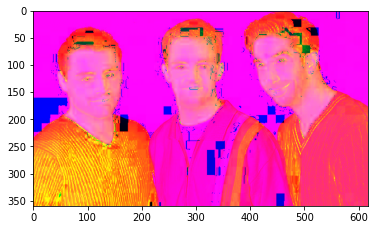

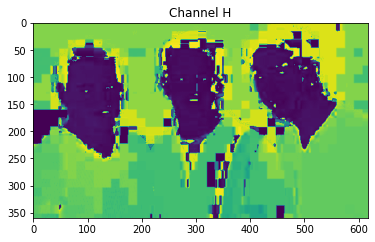

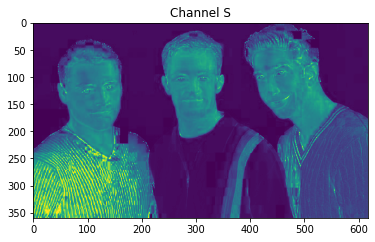

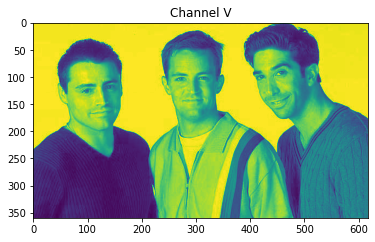

In [40]:
plt.imshow(img_hsv)
plt.show()

plt.imshow(img_hsv[:,:,0])
plt.title("Channel H")
plt.show()
plt.imshow(img_hsv[:,:,1])
plt.title("Channel S")
plt.show()
plt.imshow(img_hsv[:,:,2])
plt.title("Channel V")
plt.show()

# Using Library

(360, 618, 3) uint8
255 0


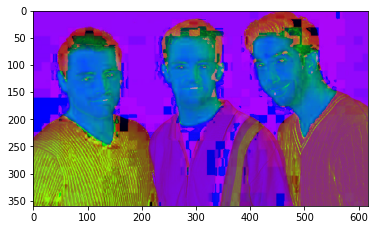

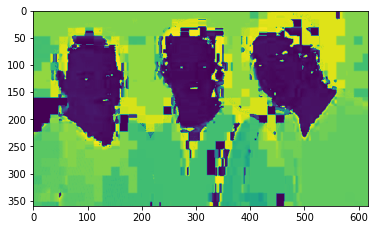

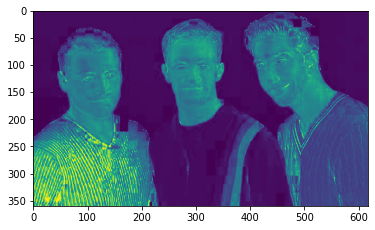

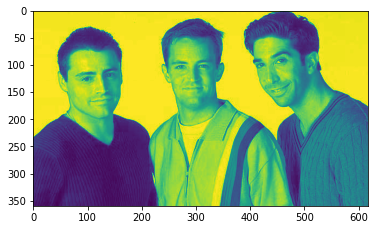

In [15]:

img = cv2.imread('image/1.jpg')
im_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
print(im_hsv.shape, im_hsv.dtype)
print(im_hsv.max(), im_hsv.min())

plt.imshow(im_hsv)
plt.show()

plt.imshow(im_hsv[:,:,0])
plt.show()
plt.imshow(im_hsv[:,:,1])
plt.show()
plt.imshow(im_hsv[:,:,2])
plt.show()

# YCrCb

(360, 618, 3) uint8
255 0


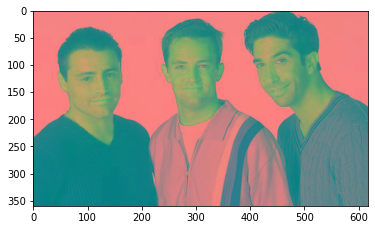

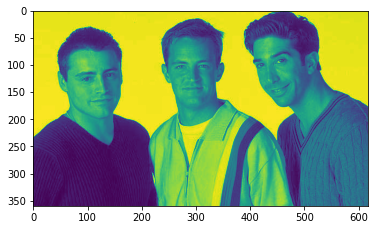

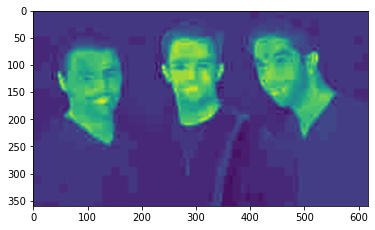

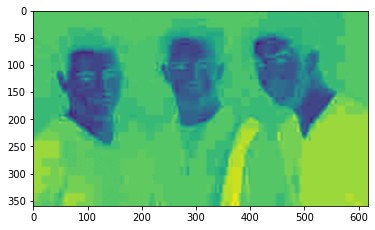

In [16]:

img = cv2.imread('image/1.jpg')
im_ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
print(im_ycrcb.shape, im_ycrcb.dtype)
print(im_ycrcb.max(), im_ycrcb.min())

plt.imshow(im_ycrcb)
plt.show()


plt.imshow(im_ycrcb[:,:,0])
plt.show()
plt.imshow(im_ycrcb[:,:,1])
plt.show()
plt.imshow(im_ycrcb[:,:,2])
plt.show()

In [41]:
def bgr2ycbcr(bgr_image):
    rows = bgr_image.shape[0]
    cols = bgr_image.shape[1]
    
    YCrCv_image = np.zeros(shape = bgr_image.shape)
    
    print(rows,cols)
    
    for i in range(0, rows):
        for j in range(0, cols):
            R = bgr_image[i, j][2]
            G = bgr_image[i, j][1]
            B = bgr_image[i, j][0]
            
            Y =   0  +    0.299*R +    0.587*G  + 0.114*B
            Cb = 128 - 0.168736*R - 0.331264*G  + 0.5*B
            Cr = 128 + 0.5*R      -  0.418688*G -  0.081312*B
            
            YCrCv_image[i, j] = Y, Cr, Cb
            
    return YCrCv_image
            
img = plt.imread('image/1.jpg')            
YCrCb = bgr2ycbcr(img)

360 618


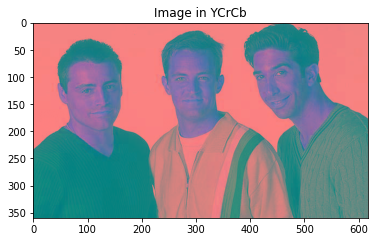

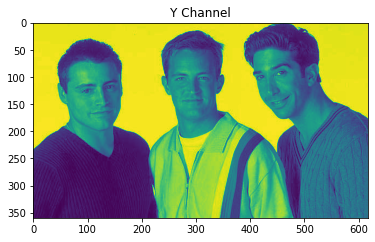

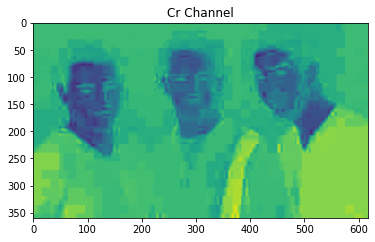

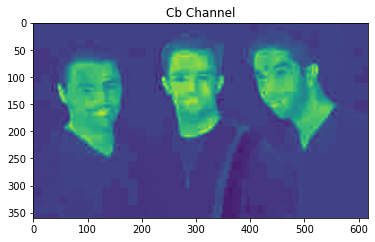

In [42]:
plt.title('Image in YCrCb')
plt.imshow(YCrCb/255.0)
plt.show()

plt.title('Y Channel')
plt.imshow(YCrCb[:,:,0])
plt.show()

plt.title('Cr Channel')
plt.imshow(YCrCb[:,:,1])
plt.show()

plt.title('Cb Channel')
plt.imshow(YCrCb[:,:,2])
plt.show()

# Gray

(360, 618) uint8
255 0


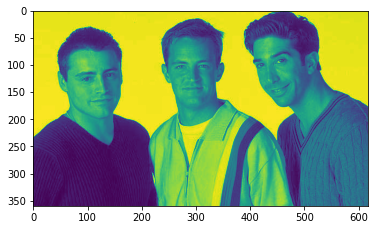

In [46]:
img = cv2.imread('image/1.jpg')
im_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(im_gray.shape, im_gray.dtype)
print(im_gray.max(), im_gray.min())

plt.imshow(im_gray)
plt.show()

In [51]:
def bgr2gray(bgr_image):
    rows = bgr_image.shape[0]
    cols = bgr_image.shape[1]
    
    gray_image = np.zeros(shape = bgr_image.shape)
    
    print(rows,cols)
    
    for i in range(0, rows):
        for j in range(0, cols):
            R = bgr_image[i, j][2]
            G = bgr_image[i, j][1]
            B = bgr_image[i, j][0]
            
            L = R * 299/1000 + G * 587/1000 + B * 114/1000
            
            gray_image[i, j] = L
            
    return gray_image[:,:,0]

360 618


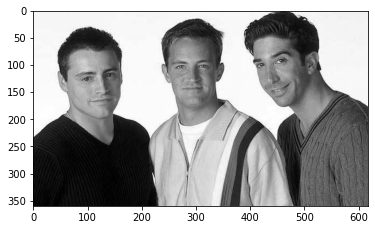

In [52]:
img = cv2.imread('image/1.jpg')
gray = bgr2gray(img)  

just_gray = np.zeros((gray.shape[0],gray.shape[1],3), dtype=int)
just_gray[:,:,0] = gray
just_gray[:,:,1] = gray
just_gray[:,:,2] = gray

plt.imshow(just_gray)
plt.show()

# Mask Generation

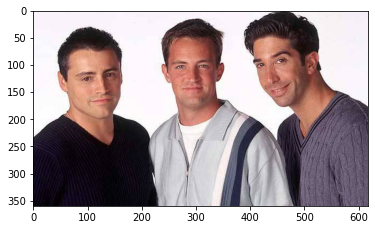

In [53]:
img = cv2.imread('image/1.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

# Normalized space

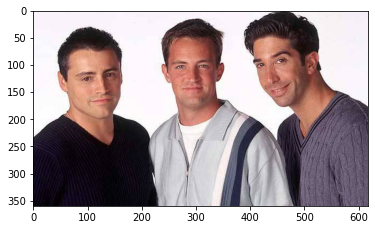

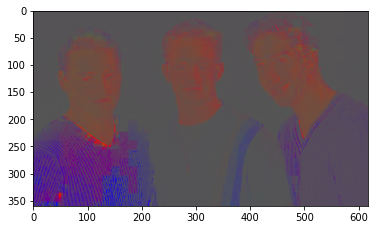

In [104]:
img = cv2.imread('image/1.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

normal_image = np.zeros(shape=img.shape)

for i in range(0, img.shape[0]):
    for j in range(0, img.shape[1]):
        R = float(img[i, j][0])
        G = float(img[i, j][1])
        B = float(img[i, j][2])
        
        if(B == G == R == 0):
            B = G = R = 1
        
        RGB_sum = (B + G + R)
        r = R/RGB_sum
        g = G/RGB_sum
        b = B/RGB_sum
        
#         print(B,G,R)
#         print(RGB_sum)
#         print(b,g,r)
#         print()

        normal_image[i, j] = r, g, b
            
# print(normal_image)
plt.imshow(normal_image)
plt.show()

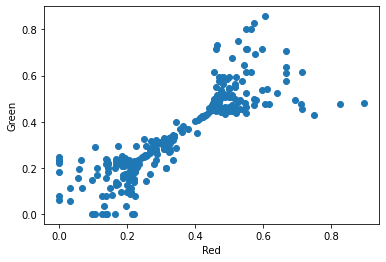

In [68]:
plt.scatter(normal_image[::,0], normal_image[::,1])
plt.xlabel('Red')
plt.ylabel('Green')
plt.show()

In [99]:
normal_image[300,100]

array([0.38235294, 0.14705882, 0.47058824])

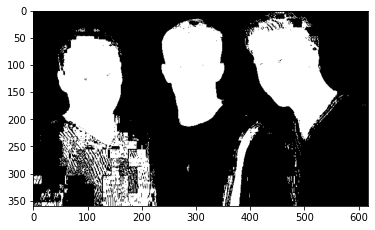

In [148]:
def extract_face(normal_image):
    mask = np.zeros(shape=normal_image.shape)
    
    for i in range(0, normal_image.shape[0]):
        for j in range(0, normal_image.shape[1]):
            if (0.3 >= normal_image[i,j,0] or normal_image[i,j,0] >= 0.37) and (0.1 <= normal_image[i,j,1] <= 0.4):
                mask[i,j] = 1,1,1
    return mask

mask = extract_face(normal_image)
plt.imshow(mask)
plt.show()

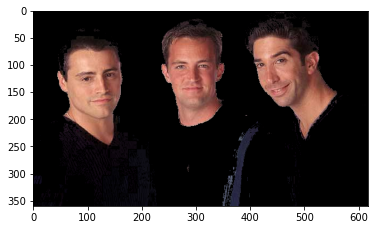

In [149]:
img = cv2.imread('image/1.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

face_image = mask.astype(int) * img
plt.imshow(face_image)
plt.show()

# Question 2 and Question 2 ExtrA:

In [7]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [12]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [13]:
train_images.shape

(50000, 32, 32, 3)

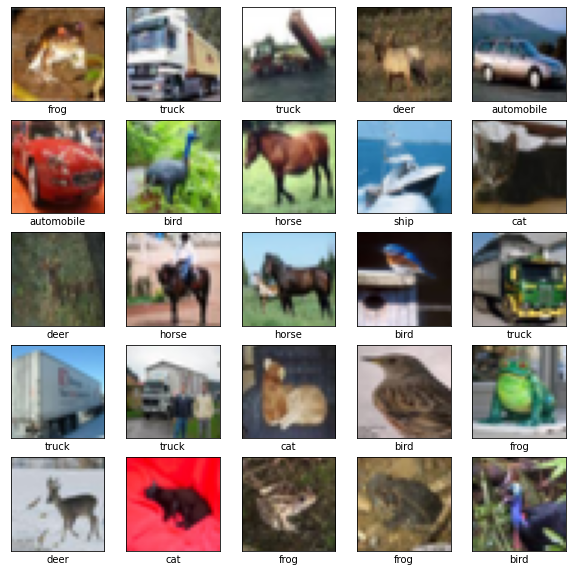

In [6]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [ ]:
def predict(x, model):
    W1, W2, b1, b2 = model['W1'], model['W2'], model['b1'], model['b2']
    h = np.dot(x, W1) + b1
    h[h < 0] = 0
    y_hat = np.dot(h, W2) + b2
    y_hat = np.argmax(y_hat, axis=1)
    return y_hat

import _pickle as pickle
import numpy as np
import os


def load_data_batch(filename):
    """ Load one batch of cifar in 'cifar-10-batches-py' with name 'data_batch_i'."""
    with open(filename, 'rb') as f:
        data = pickle.load(f, encoding='latin1')
        x, y = data['data'], np.array(data['labels'])
        x = x.reshape(10000, 3, 32, 32).transpose(0, 2, 3, 1).astype("float")
        return x, y


def load_data(path):
    """ Load all batches of cifar in 'cifar-10-batches-py' with name 'data_batch_i' as training sets
        and 'test_batch' as test set."""
    xtrain = []
    ytrain = []
    for i in range(1, 6):
        f = os.path.join(path, 'data_batch_%d' % i)
        x, y = load_data_batch(f)
        xtrain.append(x)
        ytrain.append(y)
    xtrain = np.concatenate(xtrain)
    ytrain = np.concatenate(ytrain)
    xtest, ytest = load_data_batch(os.path.join(path, 'test_batch'))
    return xtrain, ytrain, xtest, ytest

import numpy as np


class TwoLayerNeuralNet:
    """
    Class of the two-layer neural network. The class initialize a model with random parameters and
    pass through the archetecture:
    a fully connected layer -> a Relu function -> a fully connected layer -> a softmax function.
    The loss and gradients are calculated using forward and back propagation, respectively.
    """
    def __init__(self, input_size, hidden_size, output_size):
        """
        Random initialization of the parameters of weights and biases.
        Arguments:
            input_size: the dimension D of the input data
            hidden_size: the number of neurons H in the hidden layer
            output_size: the number of classes C
        Output:
        A dictionary 'model' with the four parameters:
            model['W1']: first layer weights of shape (D, H)
            model['b1']: first layer biases of shape (H,)
            model['W2']: second layer weights of shape (H, C)
            model['b2']: second layer biases of shape (C,)
        """
        self.model = {}
        self.model['W1'] = 0.00001 * np.random.randn(input_size, hidden_size)   # small random values
        # self.model['W1'] = numpy.random.uniform(low=0.0, high=1.0, size=(input_size, hidden_size))   # small random values
        self.model['b1'] = np.zeros(hidden_size)    
                                    # zeros
        self.model['W2'] = 0.00001 * np.random.randn(hidden_size, output_size)  # small random values
        # self.model['W2'] = numpy.random.uniform(low=0.0, high=1.0, size=(hidden_size, output_size))   # small random values
        self.model['b2'] = np.zeros(output_size)                                # zeros
        self.momentum_history = {}                                               # momentum history for SGD

    def nn(self, x, y=None, reg=0.0):
        """
        Define the structure of the two layer neural network. The loss and gradients are calculated using
        forward and back prop. The softmax loss function with L2 regularization is used. The hidden layer
        is passed through a Relu function to gain the non-linearity.
        Arguments:
            x: input training data of numpy.array(N, D)
            y: input training labels of shape numpy.array(N,) with label values lying in [0, C)
            reg: a float number of regularization strength
        Output:
            loss: softmax loss with L2 regularization from the forward prop
            grads: a dictionary of gradients for each parameters from the back prop
        """
        W1, W2, b1, b2 = self.model['W1'], self.model['W2'], self.model['b1'], self.model['b2']  # extract parameters
        # N, D = x.shape
        N = x.shape

        h = np.dot(x, W1) + b1                                   # first fully connected layer
        h[h < 0] = 0                                             # Relu function
        y_hat = np.dot(h, W2) + b2                               # second fully connected layer
        y_hat = (y_hat.T - np.max(y_hat.T, axis=0)).T            # max trick
        p = (np.exp(y_hat).T / np.sum(np.exp(y_hat), axis=1)).T  # Softmax function

        # return predicted label if used for prediction
        if y is None:
            return np.argmax(y_hat, axis=1)

        # calculate loss
        LW = -1 / N * np.sum(np.log(p[range(N), y]))
        RW = 0.5 * (np.sum(np.multiply(W1, W1)) + np.sum(np.multiply(W2, W2)))
        loss = LW + RW * reg

        # calculate gradients
        grads = {}
        p[range(len(y)), y] -= 1
        grads['b2'] = np.mean(p, axis=0)
        grads['W2'] = 1 / N * np.dot(h.T, p) + reg * W2
        delta = p.dot(W2.T) * (h > 0)  # from other sources, not quite sure how it works
        grads['b1'] = np.mean(delta, axis=0)
        grads['W1'] = 1 / N * np.dot(x.T, delta) + reg * W1

        return loss, grads

    def train(self, x, y, x_val, y_val, reg=0.0, lr=1e-6, momentum=0, lr_decay=0.95, decay_rate=0.95,
              method='momentum', mini_batch_SGD=True, num_epoch=50, batch_size=100):
        """
            Train the neural network with different methods.
            Arguments:
                x: input training data of numpy.array(N, D)
                y: input training labels of shape numpy.array(N,) with label values lying in [0, C)
                x_val: validation data of numpy.array(N_val, D)
                y_val: validation labels of shape numpy.array(N_val,) with label values lying in [0, C)
                reg: a float number of regularization strength
                lr: learning rate
                momentum: momentum in SGD with momentum
                decay_rate: learning rate decay used in RMS-prop
                lr_decay: learning rate decay used in training
                method: the update method to be used, can be one of 'sgd', 'momentum', or 'rmsprop'
                mini_batch_SGD: mini-batch SGD for parameter update if True, all data GD if False
                num_epoch: number of epoches
                batch_size: batch size used for mini-batch SGD
            Output:
                best_model: model with the best performance on the validation set
                loss_history: history of loss
                train_history: list of training accuracy for each epoch
                val_history: list of validation accuracy for each epoch
            """
        N = x.shape[0]  # number of data
        if mini_batch_SGD:
            iter_per_epoch = N // batch_size  # use mini-batch SGD
        else:
            iter_per_epoch = N  # use GD
        num_iters = num_epoch * iter_per_epoch  # number of iterations
        epoch = 0
        best_val_acc = 0.0
        best_model = {}
        loss_history = []
        train_history = []
        val_history = []

        # train
        for it in range(num_iters):
            # get batches of data
            if mini_batch_SGD:
                idx = np.random.choice(N, batch_size, replace=True)
                x_batch = x[idx]
                y_batch = y[idx]
            else:
                x_batch = x
                y_batch = y

            # calculate loss and gradients
            loss, grads = self.nn(x_batch, y_batch, reg)
            loss_history.append(loss)

            # update parameter
            for param in self.model:
                if method == 'momentum':
                  if not param in self.momentum_history:
                      self.momentum_history[param] = np.zeros_like(grads[param])
                  self.momentum_history[param] = momentum * self.momentum_history[param] + lr * grads[param]
                  dx = - self.momentum_history[param]
                self.model[param] += dx

            # evaluate on the validation set
            if it == 0 or (it + 1) % iter_per_epoch == 0:
                if it != 0:
                    lr *= lr_decay  # decay the learning rate
                    epoch += 1

                # evaluate training accuracy with randomly chosen data
                if N >= 1000:
                    idx = np.random.choice(N, 1000, replace=True)
                    x_train_evl = x[idx]
                    y_train_evl = y[idx]
                else:
                    x_train_evl = x
                    y_train_evl = y
                y_pre = self.nn(x_train_evl)
                train_acc = np.mean(y_train_evl == y_pre)
                train_history.append(train_acc)

                # calculate evaluation set accuracy
                y_pre = self.nn(x_val)
                val_acc = np.mean(y_val == y_pre)
                val_history.append(val_acc)

                # update the best model so far
                if val_acc > best_val_acc:
                    best_model = self.model.copy()
                    best_val_acc = val_acc

                print('Finished epoch %d / %d: loss - %f, train accuracy - %f, validation accuracy - %f, '
                      'learning rate - %e' % (epoch, num_epoch, loss, train_acc, val_acc, lr))

        print('finished optimization. best validation accuracy: %f' % (best_val_acc,))

        return best_model, loss_history, train_history, val_history

In [ ]:
import matplotlib.pyplot as plt
import numpy
x_train, y_train, x_test, y_test = load_data('/content/drive/MyDrive/cifar-10-batches-py')  # load dataset

# create training/validation/test sets
N_train, N_test = x_train.shape[0], x_test.shape[0]
percent_val = 0.1   # define percentage of validation and test data to be used

#  Convert to Gray Scale
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

# print(x_train)
x_train = rgb2gray(x_train)    
x_test = rgb2gray(x_test)    

# reshape data to rows
x_train = x_train.reshape(N_train, -1)
x_test = x_test.reshape(N_test, -1)


# from sklearn.decomposition import PCA
# # PCA deComposition
# pca = PCA(n_components=128)
# x_train = pca.fit_transform(x_train)
# x_test = pca.transform(x_test)
  

# since the dataset is already shuffled, the train/val/test sets can be defined with simply slicing
x_val = x_train[int(-N_train*percent_val):]
y_val = y_train[int(-N_train*percent_val):]
x_train = x_train[:int(-N_train*percent_val)]
y_train = y_train[:int(-N_train*percent_val)]


# normalize to range 0-1
# x_train = x_train / 255.0
# x_test = x_test / 255.0

# normalize the image data
image_mean = np.mean(x_train, axis=0)
x_train -= image_mean
x_val -= image_mean
x_test -= image_mean

print('Training data shape: ', x_train.shape, '     Train labels shape: ', y_train.shape)
print('Validation data shape: ', x_val.shape, '     Train labels shape: ', y_val.shape)
print('Test data shape:     ', x_test.shape, '     Test labels shape: ', y_test.shape)
print()

classifier = TwoLayerNeuralNet(1024, 150, 10)  # initialize the neural net
best_model, loss_history, train_history, val_history = \
    classifier.train(x_train, y_train, x_val, y_val, reg=0.0001, lr=1e-4, momentum=0.9, lr_decay=0.9,
                     method='momentum', mini_batch_SGD=True, num_epoch=20, batch_size=128)

# plot the loss, accuracy curves
# plt.subplot(2, 1, 1)
plt.figure(figsize=(8,8))
plt.plot(loss_history)
plt.title('Loss history')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training loss', 'Validation loss'], loc='lower right')
plt.show()

# plt.subplot(2, 1, 2)
plt.figure(figsize=(8,8))
plt.plot(train_history)
plt.plot(val_history)
plt.legend(['Training accuracy', 'Validation accuracy'], loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.show()

test_pre = predict(x_test, best_model)
print('Test accuracy: ', np.mean(test_pre == y_test))

# Question 3

In [ ]:
# baseline model with dropout and data augmentation on the cifar10 dataset
import sys
from matplotlib import pyplot
import keras
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential, Model
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dropout
from keras.layers import BatchNormalization

# load train and test dataset
def load_dataset():
    # load dataset
    (trainX, trainY), (testX, testY) = cifar10.load_data()
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY

# scale pixels
def prep_pixels(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm

# define cnn model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    # model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    # model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    # model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=10000,
    decay_rate=0.9)
    
    opt = SGD(lr=1e-3, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    
    model.summary() 
    return model

# plot diagnostic learning curves
def summarize_diagnostics(history):
    # plot loss
    # pyplot.subplot(211)
    pyplot.figure(figsize=(8,8))
    pyplot.title('Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='validatation')
    pyplot.legend()
    pyplot.show()

    # plot accuracy
    # pyplot.subplot(212)
    pyplot.figure(figsize=(8,8))
    pyplot.title('Accuracy')
    pyplot.plot(history.history['accuracy'], color='blue', label='train')
    pyplot.plot(history.history['val_accuracy'], color='orange', label='validatation')
    pyplot.legend()
    pyplot.show()
    # save plot to file
    # filename = sys.argv[0].split('/')[-1]
    # pyplot.savefig(filename + '_plot.png')
    # pyplot.close()

# run the test harness for evaluating a model
# load dataset
trainX, trainY, testX, testY = load_dataset()
# prepare pixel data
trainX, testX = prep_pixels(trainX, testX)
# define model
model = define_model()

# fit model
steps = int(trainX.shape[0] / 64)
history = model.fit(trainX, trainY, epochs=20, validation_split=0.1, batch_size=128 , verbose=1)
# evaluate model
_, acc = model.evaluate(testX, testY, verbose=1)
print('Test Accuracy is :  %.3f' % (acc * 100.0))
# learning curves
summarize_diagnostics(history)

        

In [ ]:
# =============================================
# Keract visualizations
# =============================================

from keract import get_activations, display_activations
keract_inputs = testX[:1]
keract_targets = testY[:1]
activations = get_activations(model, keract_inputs)
display_activations(activations, cmap="gray", save=False)